# Welcome to Machine Learning

*\[Machine Learning is \] field of study that gives computers the ability to learn without being explicitly programmed.* --- Arthur Samuel, 1959

Let's compare a traditional approach to solving a program with a computer versus a machine learning approach to solving a problem.

<img src="images/traditional_vs_ml.png" width=400>

Let's consider a standard problem: *Given a set of emails, classify them as spam or non-spam.*

## Traditional Approach to this problem

Here is an example of the path we might take to develop this classification:

1. First, we would identify some common phrases in a spam message ("4U", "credit card", "free", "amazing", "one simple trick", ...). We might also identify some other common patterns in sender's name, email's name, domains, ...

2. We would write set of rules (pattern recognition).

3. We would then test our program and likely write more rules

4. This would continue until our program worked well enough.


## Machine Learning Approach

1. We take in a large number of emails that have been labeled as spam or not.

2. We define some features, such as domains, message length, ...

3. We process the emails by a machine learning model.

4. We allow the model to reach an accept level of accuracy. 



# Machine Learning terminology

There is some terminology that has become the common way to refer to different components of the system.

## Features

_Features_ are the input values for making a model. For instance, the feature set for a model to describe salary offer for a potential new employee may include:
* Years Education
* Degrees completed
* Years Experience in similar positions
* Previous salary
* Previous job location
* Need to fill the position 

The features may be numbers (years education, years experience, ...) or they may be discrete categories (degrees completed). 

## Labels

Labels are quantities or qualities that we are attempting to predict using our model.

## Training Data

This the data that is used to develop the model.

## Testing Data

This is the data used to evaluate the model. 

## Holdout Data

This is data that is not used in either training or testing of the model.



# Approaches to ML

## Supervised Learning

In supervised learning, models are developed by using labeled data.

Supervised learning algorithms include regression analysis, devision trees, k-nearest neighbors, neural networks, and support vector machines. 

## Unsupervised Learning

In unsupervised learning, the data _does not_ have labels, so there is no expectation for a predicted property for the system. 
Often, deep trends are found.

Unsupervised learning algorithms include k-means clustering, association analysis, social network analysis, and descending dimension algorithms. 

## Reinforcement Learning

In reinforcement learning, the model is given a task, such as playing a video game. Then the model builds towards some goal, such as gaining the most number of points, without human intervention.

Unlike supervised and unsupervised learning, reinforcement learning continuously improves its model by leveraging feedback from  previous iterations. 

# Types of Problems in ML

## Regression

Regression problems are cases where a numeric answer is predicted based on the feature set. As an example, we may predict the cost of an apartment based on the feature set:
* Square footage
* Number of bedrooms
* Number of bathrooms
* Presence of any number of amenities
* Crime rate in the local area
* etc


There are a number of types of regression:
* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector for Regression (SVR)
* Decision Tree Classification
* Random Forest Classification

## Classification

In classification problems, a discrete property or class is determined based on the feature set (which may be discrete or numeric as desired). As an example, we may classify if school will be on *normal schedule*, *delayed schedule*, or *canceled* based on an number of feature:

* Temperature
* Presence of Ice
* Amount Snowfall since midnight on the day
* Number of students within 1 mile
* Number of students within 5 miles
* Number of students with greater than 5 mile distance
* Number of faculty and staff within 1 mile
* Number of faculty and staff within 5 miles
* Number of faculty and staff with greater than 5 mile distance
* Has a state of emergency been declared
* etc


## Clustering

Clustering is the partitioning the unlabeled data using potential underlying structure that may not be apparent to us.



   Height  Weight
0   65.78  112.99
1   71.52  136.49
2   69.40  153.03
3   68.22  142.34
4   67.79  144.30


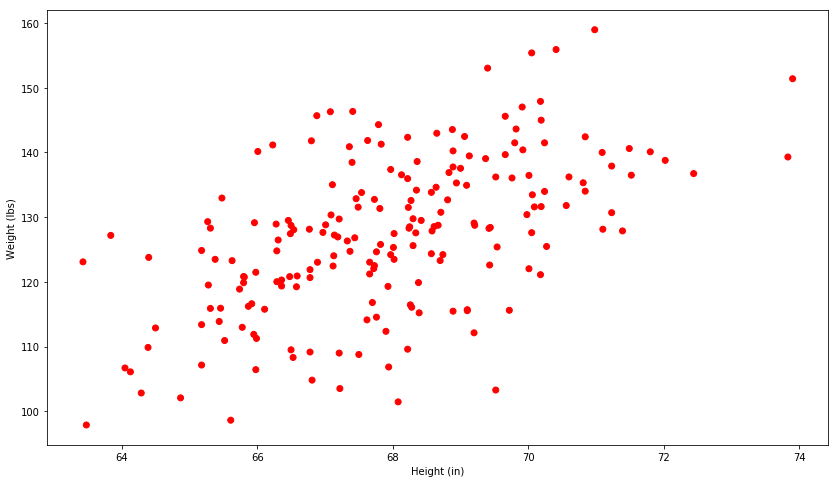

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

def ScatterPlot(X, Y, assignments=None, centers=None):
  if assignments is None:
    assignments = [0] * len(X)
  fig = plt.figure(figsize=(14,8))
  cmap = ListedColormap(['red', 'green', 'blue', 'magenta'])
  plt.scatter(X, Y, c=assignments, cmap=cmap)
  if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), 
                marker='+', s=400, cmap=cmap)  
  plt.xlabel('Height (in)')
  plt.ylabel('Weight (lbs)')
  plt.show()

# For Google Colab
url = 'https://raw.githubusercontent.com/chrisblanton/PSU_ICS_MachineLearning/master/Spring2019/Workshop1_Introduction/datasets/hw-data.txt'
hw_frame = pd.read_csv(
  url, delim_whitespace=True,
  header=None, names=['Index', 'Height', 'Weight'])

#hw_frame = pd.read_csv(
#  './datasets/hw-data.txt', delim_whitespace=True,
#  header=None, names=['Index', 'Height', 'Weight'])
hw_frame.drop('Index', 1, inplace=True)
print(hw_frame.head(5))
  
ScatterPlot(hw_frame.Height, hw_frame.Weight)


In [2]:
def input_fn():
  return tf.constant(hw_frame.as_matrix(), tf.float32, hw_frame.shape), None

In [3]:
tf.logging.set_verbosity(tf.logging.ERROR)
kmeans = tf.contrib.learn.KMeansClustering(num_clusters=4, relative_tolerance=0.0001)
_ = kmeans.fit(input_fn=input_fn)

C:\Users\chris_000\AppData\Local\conda\conda\envs\psu_tf_workshop_py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


C:\Users\chris_000\AppData\Local\conda\conda\envs\psu_tf_workshop_py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


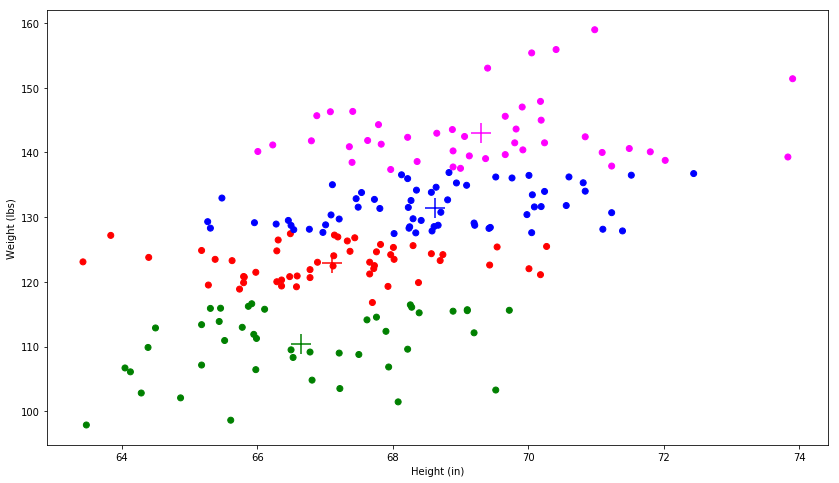

In [4]:
clusters = kmeans.clusters()
assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))
ScatterPlot(hw_frame.Height, hw_frame.Weight, assignments, clusters)

# Limitations of Machine Learning

Machine learning programs often fail to deliver expected results, which can occur due to many reasons:

* Lack of Data
* Lack of access to data
* Data bias
* Privacy problems
* Badly chosen tasks and algorithms

Machine Learning is not magical solution. 

# Machine learning process

1. Prepare data for analysis
2. Split data into training and test data
3. Nominate suitable algorithms to analyze the data.
4. Configure and modify algorithms hyperparameters
5. Develop a model that accurately predicts training and test data. 

# Resources for Further Study


* [Google Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro)
* [Udemy](http://https://www.udemy.com)
    * Machine Learning A-Z: Hands-On Python & R in Data Science
    * Complete Guide to TensorFlow for Deep Learning with Python
    * Machine Learning Practical: 6 Real-World Applications
